In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.config('spark.debug.maxToStringFields', '100').appName('722-a4').getOrCreate()

In [2]:
df = spark.read.csv('./Crash_Analysis_System_CAS_dataAuckland.csv', inferSchema=True,header=True )


In [3]:
# I tried to use df.show() but it looks very messy because there are too many columns, so the table looks not good.
#So I use pandas just to show the table. The main function are done using pyspark
#import pandas as pd
df.toPandas().head()
#df.show()


,OBJECTID,advisorySpeed,bicycle,bus,carStationWagon,crashLocation1,crashLocation2,crashSeverity,crashSHDescription,crashYear,...,seriousInjuryCount,speedLimit,streetLight,trafficControl,trafficSign,truck,urban,vanOrUtility,weatherA,weatherB
0,1041,NaN,0,0,2,KING EDWARD PARADE,CHURCH ST,Minor Crash,No,2017,...,0,50.0,Null,Unknown,0.0,0,Urban,1,Fine,Null
1,1156,NaN,0,0,2,TI RAKAU DRIVE,MARRIOTT ROAD,Minor Crash,No,2017,...,0,60.0,Null,Give way,NaN,0,Urban,0,Fine,Null
2,1190,NaN,0,0,1,SH 16,BOND OBR,Non-Injury Crash,Yes,2017,...,0,80.0,On,Unknown,NaN,0,Open,0,Fine,Null
3,1198,NaN,0,0,1,NEILSON ST,CHURCH ST,Minor Crash,No,2017,...,0,50.0,Null,Unknown,0.0,0,Urban,0,Fine,Null
4,1211,NaN,0,0,2,GREAT SOUTH ROAD,COSTAR PLACE,Non-Injury Crash,No,2017,...,0,60.0,On,Unknown,NaN,0,Urban,0,Light rain,Null


In [4]:
df.describe().toPandas().head()

,summary,OBJECTID,advisorySpeed,bicycle,bus,carStationWagon,crashLocation1,crashLocation2,crashSeverity,crashSHDescription,...,seriousInjuryCount,speedLimit,streetLight,trafficControl,trafficSign,truck,urban,vanOrUtility,weatherA,weatherB
0,count,33029,1053,33029,33029,33029,33029,32918,33029,33029,...,33029,32861,33029,33029,11749,33029,33029,33029,33029,33029
1,mean,353997.99037209724,47.73979107312441,0.022707317811620092,0.022192618607890038,1.424021314602319,None,None,None,None,...,0.050198310575554815,61.8456529016159,None,None,0.04281215422589157,0.08135275061309757,None,0.1822943473916861,None,None
2,stddev,203828.7479309032,14.51597725865533,0.15238699750913423,0.15016167567324265,0.8162724787888098,None,None,None,None,...,0.24439776034524094,19.83829267104808,None,None,0.20411694893130813,0.285409027396507,None,0.4232053322565931,None,None
3,min,5,15,0,0,0,KEPA ROAD,ELLERSLIE-PANMURE HWY OFF RAMP,Fatal Crash,No,...,0,5,None,Give way,0,0,Open,0,Fine,Frost
4,max,705811,95,4,3,10,ZURICH PL,ZODIAC STREET,Serious Crash,Yes,...,6,110,On,Unknown,2,3,Urban,4,Snow,Strong wind


In [5]:
df.columns

['OBJECTID',
 'advisorySpeed',
 'bicycle',
 'bus',
 'carStationWagon',
 'crashLocation1',
 'crashLocation2',
 'crashSeverity',
 'crashSHDescription',
 'crashYear',
 'ditch',
 'fatalCount',
 'flatHill',
 'guardRail',
 'intersectionMidblock',
 'junctionType',
 'light',
 'minorInjuryCount',
 'motorcycle',
 'NumberOfLanes',
 'parkedVehicle',
 'pedestrian',
 'region',
 'roadCharacter',
 'roadCurvature',
 'roadLane',
 'seriousInjuryCount',
 'speedLimit',
 'streetLight',
 'trafficControl',
 'trafficSign',
 'truck',
 'urban',
 'vanOrUtility',
 'weatherA',
 'weatherB']

In [6]:
# I tried to use df.describe().show() but it looks very messy because there are too many columns, so the table looks not good.
#So I use pandas just to show the table. The main function are done using pyspark
df.describe().toPandas().head(20)
#df.describe().show()

,summary,OBJECTID,advisorySpeed,bicycle,bus,carStationWagon,crashLocation1,crashLocation2,crashSeverity,crashSHDescription,...,seriousInjuryCount,speedLimit,streetLight,trafficControl,trafficSign,truck,urban,vanOrUtility,weatherA,weatherB
0,count,33029,1053,33029,33029,33029,33029,32918,33029,33029,...,33029,32861,33029,33029,11749,33029,33029,33029,33029,33029
1,mean,353997.99037209724,47.73979107312441,0.022707317811620092,0.022192618607890038,1.424021314602319,None,None,None,None,...,0.050198310575554815,61.8456529016159,None,None,0.04281215422589157,0.08135275061309757,None,0.1822943473916861,None,None
2,stddev,203828.7479309032,14.51597725865533,0.15238699750913423,0.15016167567324265,0.8162724787888098,None,None,None,None,...,0.24439776034524094,19.83829267104808,None,None,0.20411694893130813,0.285409027396507,None,0.4232053322565931,None,None
3,min,5,15,0,0,0,KEPA ROAD,ELLERSLIE-PANMURE HWY OFF RAMP,Fatal Crash,No,...,0,5,None,Give way,0,0,Open,0,Fine,Frost
4,max,705811,95,4,3,10,ZURICH PL,ZODIAC STREET,Serious Crash,Yes,...,6,110,On,Unknown,2,3,Urban,4,Snow,Strong wind


In [7]:
df.printSchema()

root
 |-- OBJECTID: integer (nullable = true)
 |-- advisorySpeed: integer (nullable = true)
 |-- bicycle: integer (nullable = true)
 |-- bus: integer (nullable = true)
 |-- carStationWagon: integer (nullable = true)
 |-- crashLocation1: string (nullable = true)
 |-- crashLocation2: string (nullable = true)
 |-- crashSeverity: string (nullable = true)
 |-- crashSHDescription: string (nullable = true)
 |-- crashYear: integer (nullable = true)
 |-- ditch: integer (nullable = true)
 |-- fatalCount: integer (nullable = true)
 |-- flatHill: string (nullable = true)
 |-- guardRail: integer (nullable = true)
 |-- intersectionMidblock: string (nullable = true)
 |-- junctionType: string (nullable = true)
 |-- light: string (nullable = true)
 |-- minorInjuryCount: integer (nullable = true)
 |-- motorcycle: integer (nullable = true)
 |-- NumberOfLanes: integer (nullable = true)
 |-- parkedVehicle: integer (nullable = true)
 |-- pedestrian: integer (nullable = true)
 |-- region: string (nullable = 

In [8]:
#df.na.drop().show()

In [9]:
df.count()

33029

In [10]:
#df.toPandas().head(20)

In [11]:
df = df.drop("OBJECTID","advisorySpeed","crashLocation1","crashLocation2","ditch","guardRail","parkedVehicle","pedestrian","region","vanOrUtility", "weatherB")


In [12]:
df.columns

['bicycle',
 'bus',
 'carStationWagon',
 'crashSeverity',
 'crashSHDescription',
 'crashYear',
 'fatalCount',
 'flatHill',
 'intersectionMidblock',
 'junctionType',
 'light',
 'minorInjuryCount',
 'motorcycle',
 'NumberOfLanes',
 'roadCharacter',
 'roadCurvature',
 'roadLane',
 'seriousInjuryCount',
 'speedLimit',
 'streetLight',
 'trafficControl',
 'trafficSign',
 'truck',
 'urban',
 'weatherA']

In [13]:
#df.na.drop().show()

In [14]:
df.na.drop().toPandas().head(20)  

,bicycle,bus,carStationWagon,crashSeverity,crashSHDescription,crashYear,fatalCount,flatHill,intersectionMidblock,junctionType,...,roadCurvature,roadLane,seriousInjuryCount,speedLimit,streetLight,trafficControl,trafficSign,truck,urban,weatherA
0,0,0,2,Minor Crash,No,2017,0,Flat,Midblock,Nil (Default),...,Curved,2-way,0,50,Null,Unknown,0,0,Urban,Fine
1,0,0,1,Minor Crash,No,2017,0,Hill Road,Intersection,Nil (Default),...,Straight,2-way,0,50,Null,Unknown,0,0,Urban,Fine
2,0,0,1,Minor Crash,Yes,2017,0,Flat,Midblock,Nil (Default),...,Curved,2-way,0,100,On,Unknown,0,0,Open,Light rain
3,0,0,1,Serious Crash,No,2017,0,Flat,Intersection,T Junction,...,Straight,2-way,1,100,Null,Stop,0,0,Open,Fine
4,0,1,1,Non-Injury Crash,No,2017,0,Hill Road,Intersection,T Junction,...,Straight,2-way,0,50,On,Give way,0,0,Urban,Fine
5,0,0,0,Non-Injury Crash,No,2017,0,Flat,Intersection,Crossroads,...,Straight,2-way,0,60,Null,Traffic Signals,1,0,Urban,Fine
6,0,0,2,Minor Crash,No,2017,0,Flat,Intersection,Crossroads,...,Straight,2-way,0,50,Null,Traffic Signals,0,0,Urban,Fine
7,0,1,0,Non-Injury Crash,No,2017,0,Flat,Midblock,Nil (Default),...,Straight,2-way,0,50,Null,Unknown,0,0,Urban,Fine
8,0,0,1,Minor Crash,No,2017,0,Hill Road,Midblock,Nil (Default),...,Curved,2-way,0,100,Null,Unknown,0,0,Open,Light rain
9,0,0,1,Non-Injury Crash,No,2017,0,Hill Road,Midblock,Nil (Default),...,Curved,2-way,0,80,Null,Unknown,0,0,Open,Fine


In [15]:
df.na.drop().count()

11658

In [16]:
df.count()

33029

In [17]:
df.na.drop()

DataFrame[bicycle: int, bus: int, carStationWagon: int, crashSeverity: string, crashSHDescription: string, crashYear: int, fatalCount: int, flatHill: string, intersectionMidblock: string, junctionType: string, light: string, minorInjuryCount: int, motorcycle: int, NumberOfLanes: int, roadCharacter: string, roadCurvature: string, roadLane: string, seriousInjuryCount: int, speedLimit: int, streetLight: string, trafficControl: string, trafficSign: int, truck: int, urban: string, weatherA: string]

In [18]:
#df.toPandas().head(20)

In [19]:
#df.show()

In [20]:
df.printSchema()

root
 |-- bicycle: integer (nullable = true)
 |-- bus: integer (nullable = true)
 |-- carStationWagon: integer (nullable = true)
 |-- crashSeverity: string (nullable = true)
 |-- crashSHDescription: string (nullable = true)
 |-- crashYear: integer (nullable = true)
 |-- fatalCount: integer (nullable = true)
 |-- flatHill: string (nullable = true)
 |-- intersectionMidblock: string (nullable = true)
 |-- junctionType: string (nullable = true)
 |-- light: string (nullable = true)
 |-- minorInjuryCount: integer (nullable = true)
 |-- motorcycle: integer (nullable = true)
 |-- NumberOfLanes: integer (nullable = true)
 |-- roadCharacter: string (nullable = true)
 |-- roadCurvature: string (nullable = true)
 |-- roadLane: string (nullable = true)
 |-- seriousInjuryCount: integer (nullable = true)
 |-- speedLimit: integer (nullable = true)
 |-- streetLight: string (nullable = true)
 |-- trafficControl: string (nullable = true)
 |-- trafficSign: integer (nullable = true)
 |-- truck: integer (nu

In [21]:
df = df.na.drop()

In [22]:
df.count()

11658

In [23]:
#pip install seaborn
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
dfp = df.toPandas()
fig, ax=plt.subplots(figsize=(8,8))

dfp['crashSeverity'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('CrashSeverity Distribution',fontsize=18)
#ax[0].set_ylabel('Count')

plt.show()

<Figure size 800x800 with 1 Axes>

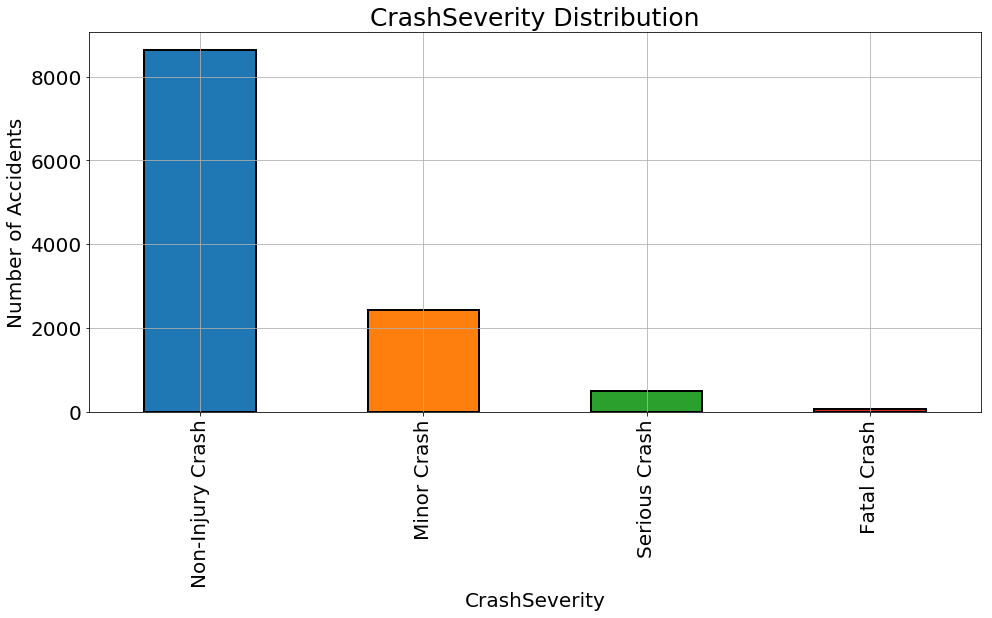

In [24]:
fig, ax=plt.subplots(figsize=(16,7))
dfp['crashSeverity'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('CrashSeverity',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('CrashSeverity Distribution',fontsize=25)
plt.grid()
plt.ioff()

In [25]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [26]:
df.columns

['bicycle',
 'bus',
 'carStationWagon',
 'crashSeverity',
 'crashSHDescription',
 'crashYear',
 'fatalCount',
 'flatHill',
 'intersectionMidblock',
 'junctionType',
 'light',
 'minorInjuryCount',
 'motorcycle',
 'NumberOfLanes',
 'roadCharacter',
 'roadCurvature',
 'roadLane',
 'seriousInjuryCount',
 'speedLimit',
 'streetLight',
 'trafficControl',
 'trafficSign',
 'truck',
 'urban',
 'weatherA']

In [27]:
from pyspark.sql import functions
def checkSeverity(s):
    
    if str(s) is "Non-Injury Crash": 
        return 1
    else:       
        return 0 
#df = df.withColumn("InjuryOrNot", functions.UserDefinedFunction(checkSeverity)(df.crashSeverity))
concat_func = functions.udf(lambda s: "Non-Injury Crash" if s == "Non-Injury Crash" else "Injury Crash") 
df = df.withColumn("InjuryOrNot", concat_func(df.crashSeverity))

In [28]:
df.toPandas().head(20)

,bicycle,bus,carStationWagon,crashSeverity,crashSHDescription,crashYear,fatalCount,flatHill,intersectionMidblock,junctionType,...,roadLane,seriousInjuryCount,speedLimit,streetLight,trafficControl,trafficSign,truck,urban,weatherA,InjuryOrNot
0,0,0,2,Minor Crash,No,2017,0,Flat,Midblock,Nil (Default),...,2-way,0,50,Null,Unknown,0,0,Urban,Fine,Injury Crash
1,0,0,1,Minor Crash,No,2017,0,Hill Road,Intersection,Nil (Default),...,2-way,0,50,Null,Unknown,0,0,Urban,Fine,Injury Crash
2,0,0,1,Minor Crash,Yes,2017,0,Flat,Midblock,Nil (Default),...,2-way,0,100,On,Unknown,0,0,Open,Light rain,Injury Crash
3,0,0,1,Serious Crash,No,2017,0,Flat,Intersection,T Junction,...,2-way,1,100,Null,Stop,0,0,Open,Fine,Injury Crash
4,0,1,1,Non-Injury Crash,No,2017,0,Hill Road,Intersection,T Junction,...,2-way,0,50,On,Give way,0,0,Urban,Fine,Non-Injury Crash
5,0,0,0,Non-Injury Crash,No,2017,0,Flat,Intersection,Crossroads,...,2-way,0,60,Null,Traffic Signals,1,0,Urban,Fine,Non-Injury Crash
6,0,0,2,Minor Crash,No,2017,0,Flat,Intersection,Crossroads,...,2-way,0,50,Null,Traffic Signals,0,0,Urban,Fine,Injury Crash
7,0,1,0,Non-Injury Crash,No,2017,0,Flat,Midblock,Nil (Default),...,2-way,0,50,Null,Unknown,0,0,Urban,Fine,Non-Injury Crash
8,0,0,1,Minor Crash,No,2017,0,Hill Road,Midblock,Nil (Default),...,2-way,0,100,Null,Unknown,0,0,Open,Light rain,Injury Crash
9,0,0,1,Non-Injury Crash,No,2017,0,Hill Road,Midblock,Nil (Default),...,2-way,0,80,Null,Unknown,0,0,Open,Fine,Non-Injury Crash


In [29]:

#df.show()

In [30]:
Sortcols = ["InjuryOrNot","crashYear", "speedLimit", "crashSHDescription","NumberOfLanes"]
df = df.orderBy(Sortcols, ascending=False)



In [31]:
df.toPandas().head(20)

,bicycle,bus,carStationWagon,crashSeverity,crashSHDescription,crashYear,fatalCount,flatHill,intersectionMidblock,junctionType,...,roadLane,seriousInjuryCount,speedLimit,streetLight,trafficControl,trafficSign,truck,urban,weatherA,InjuryOrNot
0,0,0,1,Non-Injury Crash,Yes,2019,0,Flat,Midblock,Nil (Default),...,2-way,0,100,None,Give way,0,0,Open,Light rain,Non-Injury Crash
1,0,0,1,Non-Injury Crash,Yes,2019,0,Flat,Midblock,Nil (Default),...,2-way,0,100,Off,Unknown,0,1,Open,Fine,Non-Injury Crash
2,0,0,1,Non-Injury Crash,Yes,2019,0,Flat,Intersection,Nil (Default),...,1-way,0,100,On,Unknown,0,0,Open,Fine,Non-Injury Crash
3,0,0,1,Non-Injury Crash,Yes,2019,0,Flat,Midblock,Nil (Default),...,1-way,0,100,Off,Unknown,0,0,Open,Fine,Non-Injury Crash
4,0,0,1,Non-Injury Crash,Yes,2019,0,Flat,Midblock,Nil (Default),...,1-way,0,100,On,Unknown,0,0,Open,Heavy rain,Non-Injury Crash
5,0,0,1,Non-Injury Crash,Yes,2019,0,Flat,Midblock,Nil (Default),...,1-way,0,100,Off,Unknown,1,0,Open,Fine,Non-Injury Crash
6,0,0,1,Non-Injury Crash,Yes,2019,0,Hill Road,Midblock,Nil (Default),...,1-way,0,100,On,Unknown,0,0,Open,Fine,Non-Injury Crash
7,0,0,1,Non-Injury Crash,Yes,2019,0,Flat,Midblock,Nil (Default),...,2-way,0,100,Off,Unknown,0,0,Open,Fine,Non-Injury Crash
8,0,0,1,Non-Injury Crash,Yes,2019,0,Flat,Intersection,Nil (Default),...,2-way,0,100,Off,Unknown,0,0,Open,Fine,Non-Injury Crash
9,0,0,1,Non-Injury Crash,Yes,2019,0,Flat,Midblock,Nil (Default),...,1-way,0,100,On,Unknown,0,0,Open,Fine,Non-Injury Crash


In [32]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import (StringIndexer, OneHotEncoder)

In [33]:
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in list(set(df.columns)-set(['bicycle'])-set(['bus'])-set(['crashSeverity'])-set(['carStationWagon'])-set(['motorcycle'])-set(['InjuryOrNot'])-set(['NumberOfLanes'])-set(['speedLimit'])-set(['trafficSign'])-set(['truck'])) ]
pipeline = Pipeline(stages=indexers)
df_r = pipeline.fit(df).transform(df)
#df_r.show()

In [34]:
df_r.toPandas().head(20)

,bicycle,bus,carStationWagon,crashSeverity,crashSHDescription,crashYear,fatalCount,flatHill,intersectionMidblock,junctionType,...,trafficControl_index,roadCharacter_index,crashYear_index,intersectionMidblock_index,streetLight_index,roadCurvature_index,urban_index,crashSHDescription_index,junctionType_index,seriousInjuryCount_index
0,0,0,1,Non-Injury Crash,Yes,2019,0,Flat,Midblock,Nil (Default),...,1.0,1.0,2.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0
1,0,0,1,Non-Injury Crash,Yes,2019,0,Flat,Midblock,Nil (Default),...,0.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0
2,0,0,1,Non-Injury Crash,Yes,2019,0,Flat,Intersection,Nil (Default),...,0.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3,0,0,1,Non-Injury Crash,Yes,2019,0,Flat,Midblock,Nil (Default),...,0.0,0.0,2.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0
4,0,0,1,Non-Injury Crash,Yes,2019,0,Flat,Midblock,Nil (Default),...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,0,0,1,Non-Injury Crash,Yes,2019,0,Flat,Midblock,Nil (Default),...,0.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0
6,0,0,1,Non-Injury Crash,Yes,2019,0,Hill Road,Midblock,Nil (Default),...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,0,0,1,Non-Injury Crash,Yes,2019,0,Flat,Midblock,Nil (Default),...,0.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0
8,0,0,1,Non-Injury Crash,Yes,2019,0,Flat,Intersection,Nil (Default),...,0.0,2.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0
9,0,0,1,Non-Injury Crash,Yes,2019,0,Flat,Midblock,Nil (Default),...,0.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [35]:
assembler = VectorAssembler(
  inputCols=['bicycle',
             'bus',
             'carStationWagon',            
             'crashSHDescription_index',
             'flatHill_index',
             'intersectionMidblock_index',
             'junctionType_index',
             'light_index',
             'motorcycle',
             'NumberOfLanes',
             'roadCharacter_index',
             'roadCurvature_index',
             'roadLane_index',
             'speedLimit',
             'streetLight_index',
             'trafficControl_index',
             'trafficSign',
             'truck',
             'urban_index',
             'weatherA_index'],
              outputCol="features")

In [36]:
output = assembler.transform(df_r)


In [37]:
#df_r.show()

In [38]:
#df_r.toPandas().head(20)

In [39]:
indexer = StringIndexer(inputCol="crashSeverity", outputCol="crashSeverity_Index")
output_fixed = indexer.fit(output).transform(output)

In [40]:
final_data = output_fixed.select("features",'crashSeverity_Index')

In [41]:
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [42]:
train_data.count()

8174

In [43]:
test_data.count()

3484

In [44]:
from pyspark.ml.classification import DecisionTreeClassifier,RandomForestClassifier

In [45]:
#rfc = RandomForestClassifier(labelCol='crashSeverity_Index',featuresCol='features')
##rfc.setImpurity("gini")
##rfc.setMaxDepth(8)
##rfc.setNumTrees(50)
##rfc.setFeatureSubsetStrategy("auto")
##rfc.setSeed(300)
##dtc = DecisionTreeClassifier(maxDepth = 20, labelCol='crashSeverity_Index',featuresCol='features')
#dtc = DecisionTreeClassifier(labelCol='crashSeverity_Index',featuresCol='features')

In [46]:
#rfc_model = rfc.fit(train_data)


In [47]:
#dtc_model = dtc.fit(train_data)


In [48]:
#rfc_predictions = rfc_model.transform(test_data)
#dtc_predictions = dtc_model.transform(test_data)


In [49]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

### Note that the label column isn't named label, it's named PrivateIndex in this case.
#my_binary_eval = BinaryClassificationEvaluator(labelCol = 'crashSeverity_Index')

In [50]:
#print("RFC")
#print(my_binary_eval.evaluate(rfc_predictions))

In [51]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
#acc_evaluator = MulticlassClassificationEvaluator(labelCol="crashSeverity_Index", predictionCol="prediction", metricName="accuracy")

In [52]:
#rfc_acc = acc_evaluator.evaluate(rfc_predictions)
#dtc_acc = acc_evaluator.evaluate(dtc_predictions)


#treeModel = dtc_model
#print (treeModel) # summary only
#print (treeModel.featureImportances)


In [53]:
#print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
#print('-'*40)

In [54]:
#print("DTC")
#print(my_binary_eval.evaluate(dtc_predictions))

In [55]:
#print('-'*40)
#print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))

In [56]:

indexerForInjury = StringIndexer(inputCol="InjuryOrNot", outputCol="InjuryOrNot_Index")
output_fixedForInjury = indexerForInjury.fit(output).transform(output)
final_dataForInjury = output_fixedForInjury.select("features",'InjuryOrNot_Index')
train_dataForInjury,test_dataForInjury = final_dataForInjury.randomSplit([0.7,0.3])
my_binary_evalForInjury = BinaryClassificationEvaluator(labelCol = 'InjuryOrNot_Index')
#dtcForInjury = DecisionTreeClassifier(labelCol='InjuryOrNot_Index',featuresCol='features')
##dtcForInjury = DecisionTreeClassifier(maxDepth = 20, labelCol='InjuryOrNot_Index',featuresCol='features')
#dtc_modelForInjury = dtcForInjury.fit(train_dataForInjury)
#dtc_predictionsForInjury = dtc_modelForInjury.transform(test_dataForInjury)
acc_evaluatorForInjury = MulticlassClassificationEvaluator(labelCol="InjuryOrNot_Index", predictionCol="prediction", metricName="accuracy")
#dtc_accForInjury = acc_evaluatorForInjury.evaluate(dtc_predictionsForInjury)
#print('-'*40)
#print("DTC for InjuryOrNot")
#print(my_binary_evalForInjury.evaluate(dtc_predictionsForInjury))

print('-'*40)
#print('A single decision tree for InjuryOrNot has an accuracy of: {0:2.2f}%'.format(dtc_accForInjury*100))



----------------------------------------


In [57]:
rfcForInjury = RandomForestClassifier(labelCol='InjuryOrNot_Index',featuresCol='features')
#rfcForInjury.setImpurity("gini")
#rfcForInjury.setMaxDepth(8)
#rfcForInjury.setNumTrees(50)
#rfcForInjury.setFeatureSubsetStrategy("auto")
#rfcForInjury.setSeed(300)

rfc_modelForInjury = rfcForInjury.fit(train_dataForInjury)
rfc_predictionsForInjury = rfc_modelForInjury.transform(test_dataForInjury)


rfc_accForInjury = acc_evaluatorForInjury.evaluate(rfc_predictionsForInjury)

print("RFC for InjuryOrNot")
print(my_binary_evalForInjury.evaluate(rfc_predictionsForInjury))

print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_accForInjury*100))



RFC for InjuryOrNot
0.6192403817430255
----------------------------------------
A random forest ensemble has an accuracy of: 75.59%


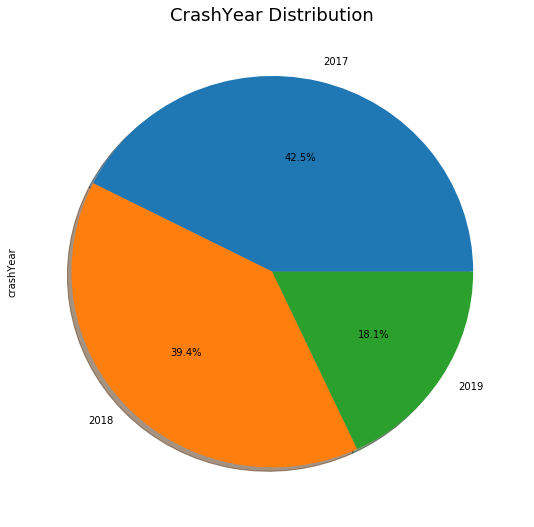

In [58]:
dfp = df.toPandas()
fig, ax=plt.subplots(figsize=(9,9))

dfp['crashYear'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('CrashYear Distribution',fontsize=18)
#ax[0].set_ylabel('Count')

plt.show()

#ss = functions.UserDefinedFunction(checkSeverity(df.crashSeverity))

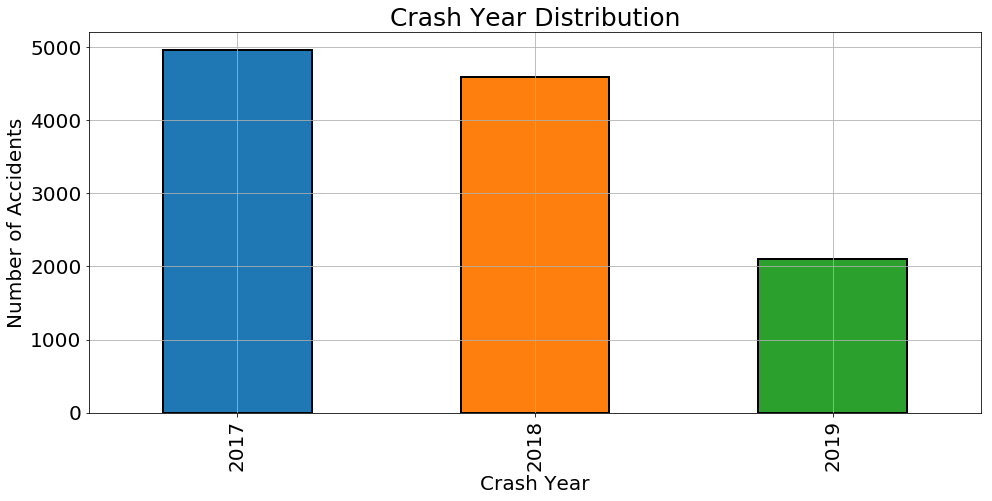

In [59]:
fig, ax=plt.subplots(figsize=(16,7))
dfp['crashYear'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Crash Year',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Crash Year Distribution',fontsize=25)
plt.grid()
plt.ioff()

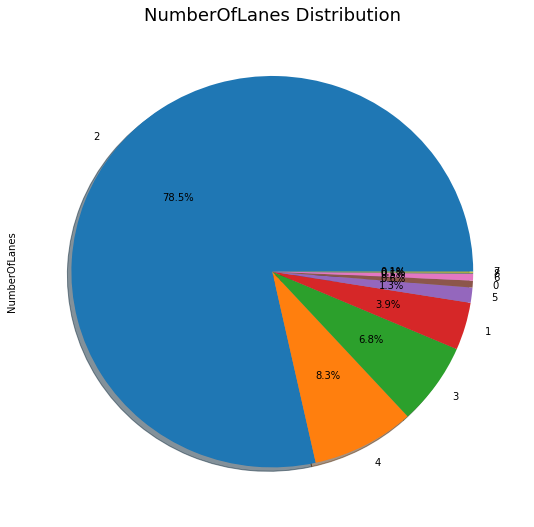

In [60]:
#dfp = df.toPandas()
fig, ax=plt.subplots(figsize=(9,9))

dfp['NumberOfLanes'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('NumberOfLanes Distribution',fontsize=18)
#ax[0].set_ylabel('Count')

plt.show()

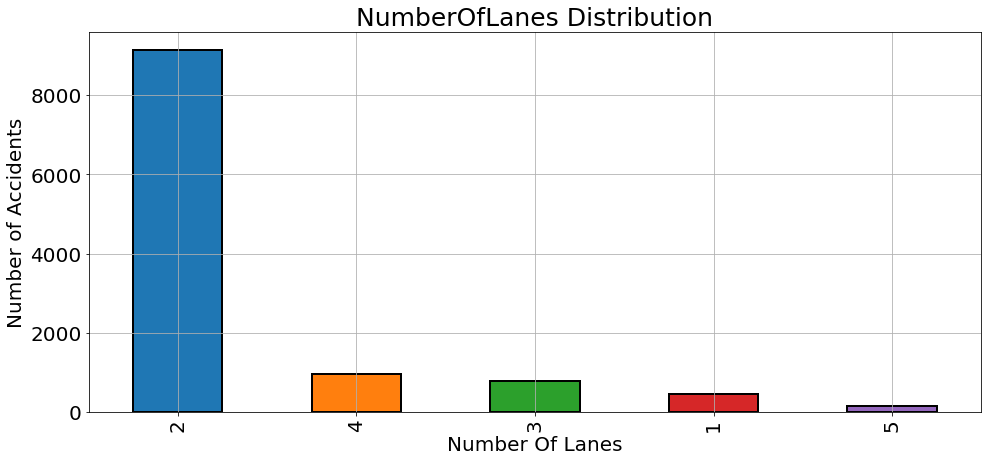

In [61]:
fig, ax=plt.subplots(figsize=(16,7))
dfp['NumberOfLanes'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Number Of Lanes',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('NumberOfLanes Distribution',fontsize=25)
plt.grid()
plt.ioff()

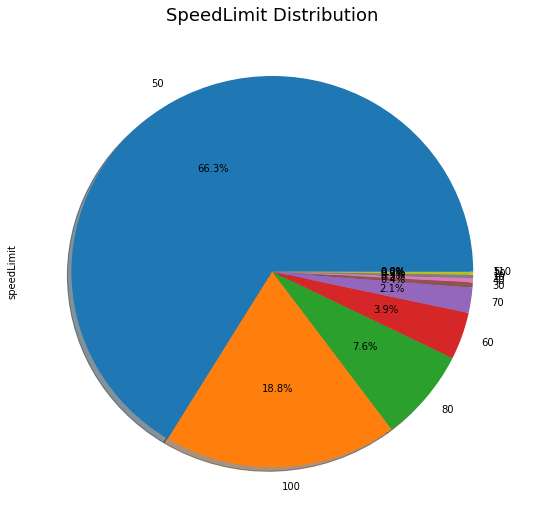

In [62]:
#dfp = df.toPandas()
fig, ax=plt.subplots(figsize=(9,9))

dfp['speedLimit'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('SpeedLimit Distribution',fontsize=18)
#ax[0].set_ylabel('Count')

plt.show()

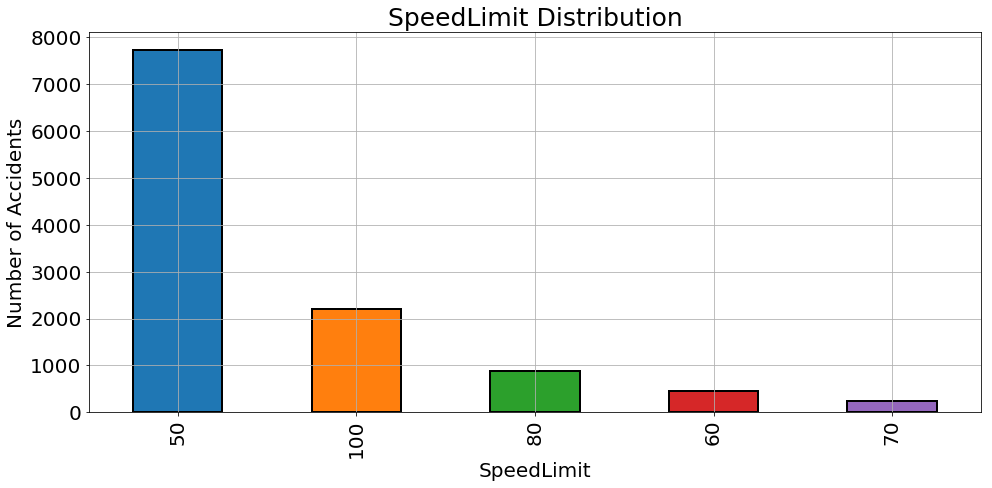

In [63]:
fig, ax=plt.subplots(figsize=(16,7))
dfp['speedLimit'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('SpeedLimit',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('SpeedLimit Distribution',fontsize=25)
plt.grid()
plt.ioff()

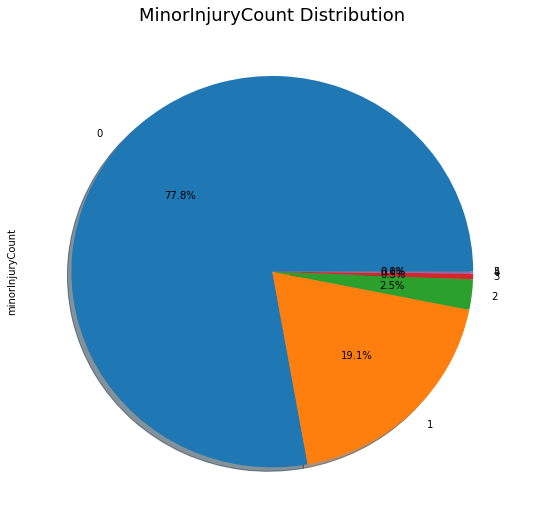

In [64]:
#dfp = df.toPandas()
fig, ax=plt.subplots(figsize=(9,9))

dfp['minorInjuryCount'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('MinorInjuryCount Distribution',fontsize=18)
#ax[0].set_ylabel('Count')

plt.show()

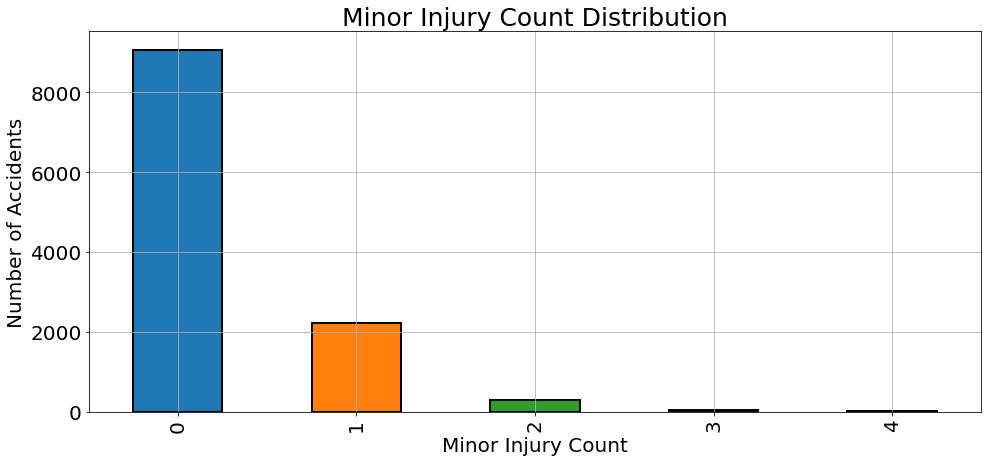

In [65]:
fig, ax=plt.subplots(figsize=(16,7))
dfp['minorInjuryCount'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Minor Injury Count',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Minor Injury Count Distribution',fontsize=25)
plt.grid()
plt.ioff()

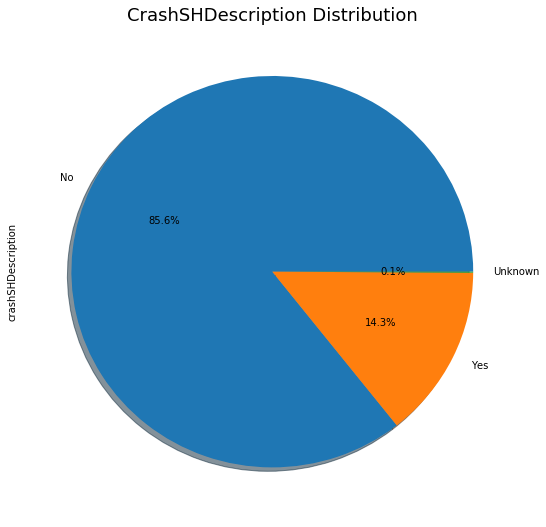

In [66]:
#dfp = df.toPandas()
fig, ax=plt.subplots(figsize=(9,9))

dfp['crashSHDescription'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('CrashSHDescription Distribution',fontsize=18)
#ax[0].set_ylabel('Count')

plt.show()

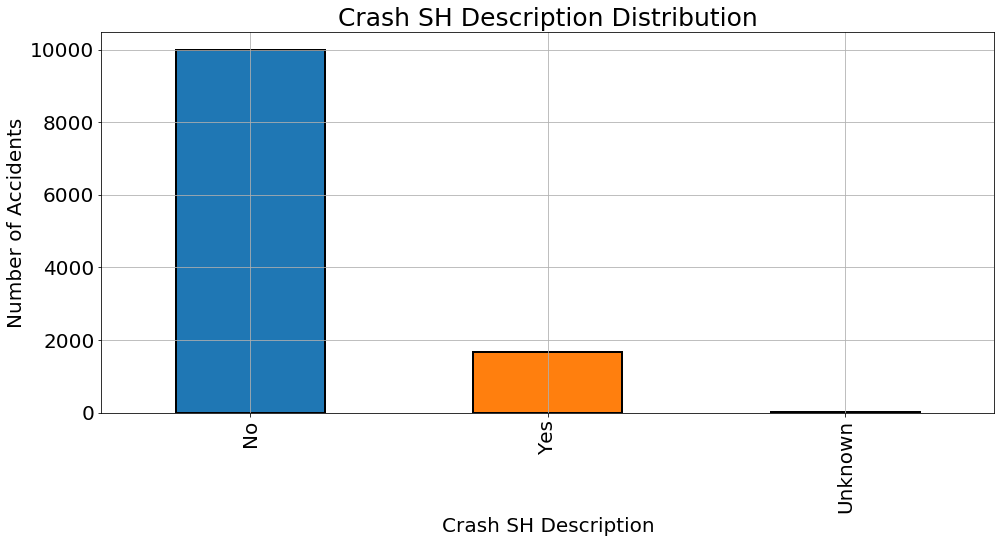

In [67]:
fig, ax=plt.subplots(figsize=(16,7))
dfp['crashSHDescription'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Crash SH Description',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Crash SH Description Distribution',fontsize=25)
plt.grid()
plt.ioff()

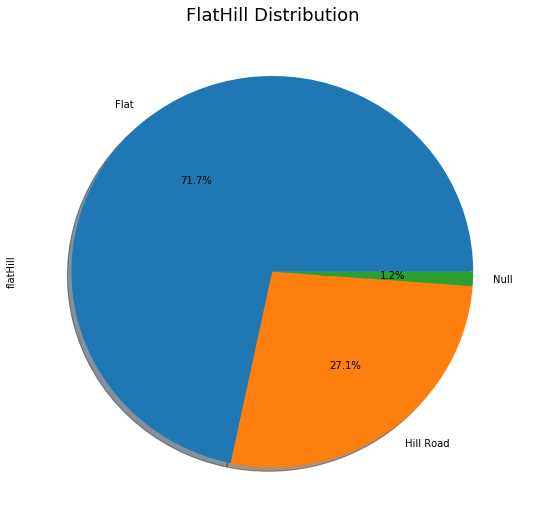

In [68]:
#dfp = df.toPandas()
fig, ax=plt.subplots(figsize=(9,9))

dfp['flatHill'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('FlatHill Distribution',fontsize=18)
#ax[0].set_ylabel('Count')

plt.show()

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
dfp['flatHill'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('FlatHill Description',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('FlatHill Distribution',fontsize=25)
plt.grid()
plt.ioff()

In [ ]:
#dfp = df.toPandas()
fig, ax=plt.subplots(figsize=(9,9))

dfp['intersectionMidblock'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('IntersectionMidblock Distribution',fontsize=18)
#ax[0].set_ylabel('Count')

plt.show()

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
dfp['intersectionMidblock'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('IntersectionMidblock Description',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('IntersectionMidblock Description Distribution',fontsize=25)
plt.grid()
plt.ioff()

In [ ]:
#dfp = df.toPandas()
fig, ax=plt.subplots(figsize=(9,9))

dfp['junctionType'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('JunctionType Distribution',fontsize=18)
#ax[0].set_ylabel('Count')

plt.show()

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
dfp['junctionType'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('JunctionType',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('JunctionType Distribution',fontsize=25)
plt.grid()
plt.ioff()

In [ ]:
#dfp = df.toPandas()
fig, ax=plt.subplots(figsize=(9,9))

dfp['light'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('Light Distribution',fontsize=18)
#ax[0].set_ylabel('Count')

plt.show()

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
dfp['light'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Light',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Light Distribution',fontsize=25)
plt.grid()
plt.ioff()

In [ ]:
#dfp = df.toPandas()
fig, ax=plt.subplots(figsize=(9,9))

dfp['roadLane'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('RoadLane Distribution',fontsize=18)
#ax[0].set_ylabel('Count')

plt.show()

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
dfp['roadLane'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('RoadLane',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('RoadLane Distribution',fontsize=25)
plt.grid()
plt.ioff()

In [ ]:
#dfp = df.toPandas()
fig, ax=plt.subplots(figsize=(9,9))

dfp['streetLight'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('streetLight Distribution',fontsize=18)
#ax[0].set_ylabel('Count')

plt.show()

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
dfp['streetLight'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('StreetLight',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('StreetLight Distribution',fontsize=25)
plt.grid()
plt.ioff()

In [ ]:
#dfp = df.toPandas()
fig, ax=plt.subplots(figsize=(9,9))

dfp['trafficSign'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('trafficSign Distribution',fontsize=18)
#ax[0].set_ylabel('Count')

plt.show()

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
dfp['trafficSign'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('TrafficSign',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('TrafficSign Distribution',fontsize=25)
plt.grid()
plt.ioff()

In [ ]:
#dfp = df.toPandas()
fig, ax=plt.subplots(figsize=(9,9))

dfp['urban'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('Urban Distribution',fontsize=18)
#ax[0].set_ylabel('Count')

plt.show()

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
dfp['urban'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Urban',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Urban Distribution',fontsize=25)
plt.grid()
plt.ioff()

In [ ]:
#dfp = df.toPandas()
fig, ax=plt.subplots(figsize=(9,9))

dfp['weatherA'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('weatherA Distribution',fontsize=18)
#ax[0].set_ylabel('Count')

plt.show()

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
dfp['weatherA'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('WeatherA',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('WeatherA Distribution',fontsize=25)
plt.grid()
plt.ioff()

In [ ]:
#dfp = df.toPandas()
fig, ax=plt.subplots(figsize=(9,9))

dfp['crashSeverity'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('crashSeverity Distribution',fontsize=18)
#ax[0].set_ylabel('Count')

plt.show()

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
dfp['crashSeverity'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('CrashSeverity',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('CrashSeverity Distribution',fontsize=25)
plt.grid()
plt.ioff()

In [ ]:
#dfp = df.toPandas()
fig, ax=plt.subplots(figsize=(9,9))

dfp['InjuryOrNot'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('InjuryOrNot Distribution',fontsize=18)
#ax[0].set_ylabel('Count')

plt.show()